In [5]:
import os
import random
from random import randrange
from IPython.display import clear_output
from PIL import Image
import os.path
import errno
import json
import codecs
import numpy as np
import sys
import matplotlib.pyplot as plt

# Open3D Imports
import open3d as o3
print(o3.__version__)

# PyTorch Imports
import torch #Version 1.7.0 is the one used in the course
print(torch.__version__)
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.nn.functional as F
if torch.cuda.is_available():
    import torch.backends.cudnn as cudnn


from pointcloud.preprocessing import ShapeNetDataset

0.15.2
1.12.0+cu113


In [6]:
CLASSES = {
    'Airplane': 0, 'Bag': 1, 'Cap': 2, 'Car': 3, 'Chair': 4, 
    'Earphone': 5, 'Guitar': 6, 'Knife': 7, 'Lamp': 8, 'Laptop': 9,
    'Motorbike': 10, 'Mug': 11, 'Pistol': 12, 'Rocket': 13, 
    'Skateboard': 14, 'Table': 15
}

# A simple point cloud coloring mapping
def read_pointnet_colors(seg_labels):
    map_label_to_rgb = {
        1: [0, 255, 0],
        2: [0, 0, 255],
        3: [255, 0, 0],
        4: [255, 0, 255],  # purple
        5: [0, 255, 255],  # cyan
        6: [255, 255, 0],  # yellow
    }
    colors = np.array([map_label_to_rgb[label] for label in seg_labels])
    return colors


Number of objects 15990
----------
Point Cloud Caracteristics:
torch.Size([2500, 3]) torch.FloatTensor torch.Size([2500]) torch.LongTensor
----------
Point Cloud
tensor([[-0.2574,  0.0499, -0.0011],
        [-0.2969,  0.0134, -0.0151],
        [-0.2855,  0.0406, -0.0055],
        ...,
        [ 0.3772,  0.0724, -0.0022],
        [ 0.4417,  0.1024,  0.0215],
        [-0.1897, -0.0344, -0.0025]])
----------
Label on Part Segmentation
tensor([1, 2, 1,  ..., 1, 1, 3])
----------
Label on Classification
Pistol


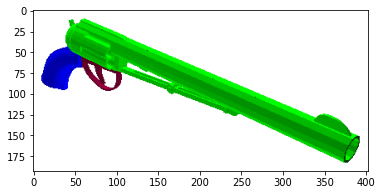

In [7]:
dataset = ShapeNetDataset(image=True)
print("Number of objects",len(dataset))
print('----------')

idx = random.randint(0,len(dataset))
ps, seg, img = dataset[idx]

print("Point Cloud Caracteristics:")
print(ps.size(), ps.type(), seg.size(),seg.type())
print('----------')
print("Point Cloud")
print(ps)
print('----------')
print("Label on Part Segmentation")
print(seg)
print('----------')

#TODO: Get a Dataset for Classification with the same index and without the image
dataset = ShapeNetDataset(classification=True)
ps2, cls = dataset[idx]

print("Label on Classification")
classes_dict_list = list(CLASSES)
print(classes_dict_list[cls.item()])

plt.imshow(np.asarray(img))

In [10]:
# o3.visualization.webrtc_server.enable_webrtc()

test_cloud = o3.geometry.PointCloud()
test_cloud.points = o3.utility.Vector3dVector(ps)
test_cloud.colors = o3.utility.Vector3dVector(read_pointnet_colors(seg.numpy()))

o3.visualization.draw_geometries([test_cloud])